## Heart Disease Detection - Decision Tree Classifier

In [18]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

%matplotlib inline

### Load the Data

In [2]:
df = pd.read_csv('../../Datasets/Heart_Disease.csv')

df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


### Understand the Data

In [3]:
df.shape

(270, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [6]:
num_cols = df.select_dtypes(include=np.number).columns
print('\033[1m'+'Numerical Columns:'+'\033[0m'+'\n')
print(num_cols)

Numerical Columns:

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')


### Splitting the Data into Train-Test set

In [7]:
# Defining x and y variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((189, 4), (81, 4))

### Train the Model

In [9]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

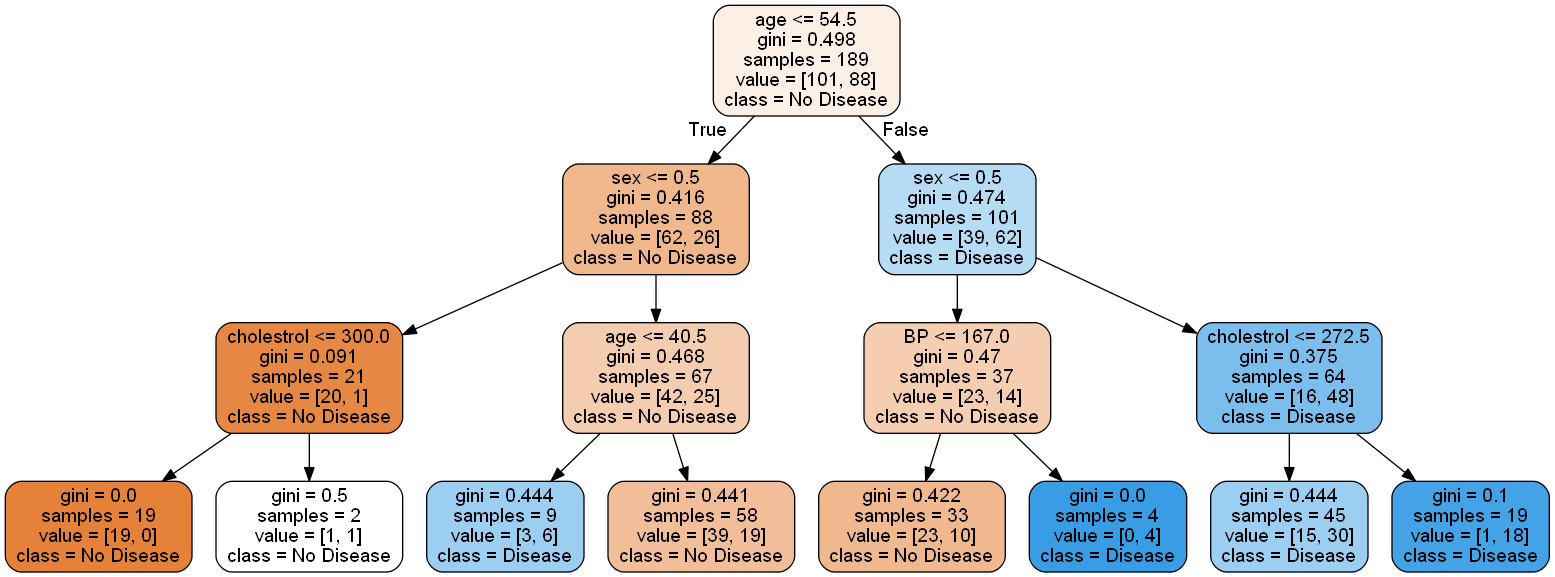

In [10]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### OR

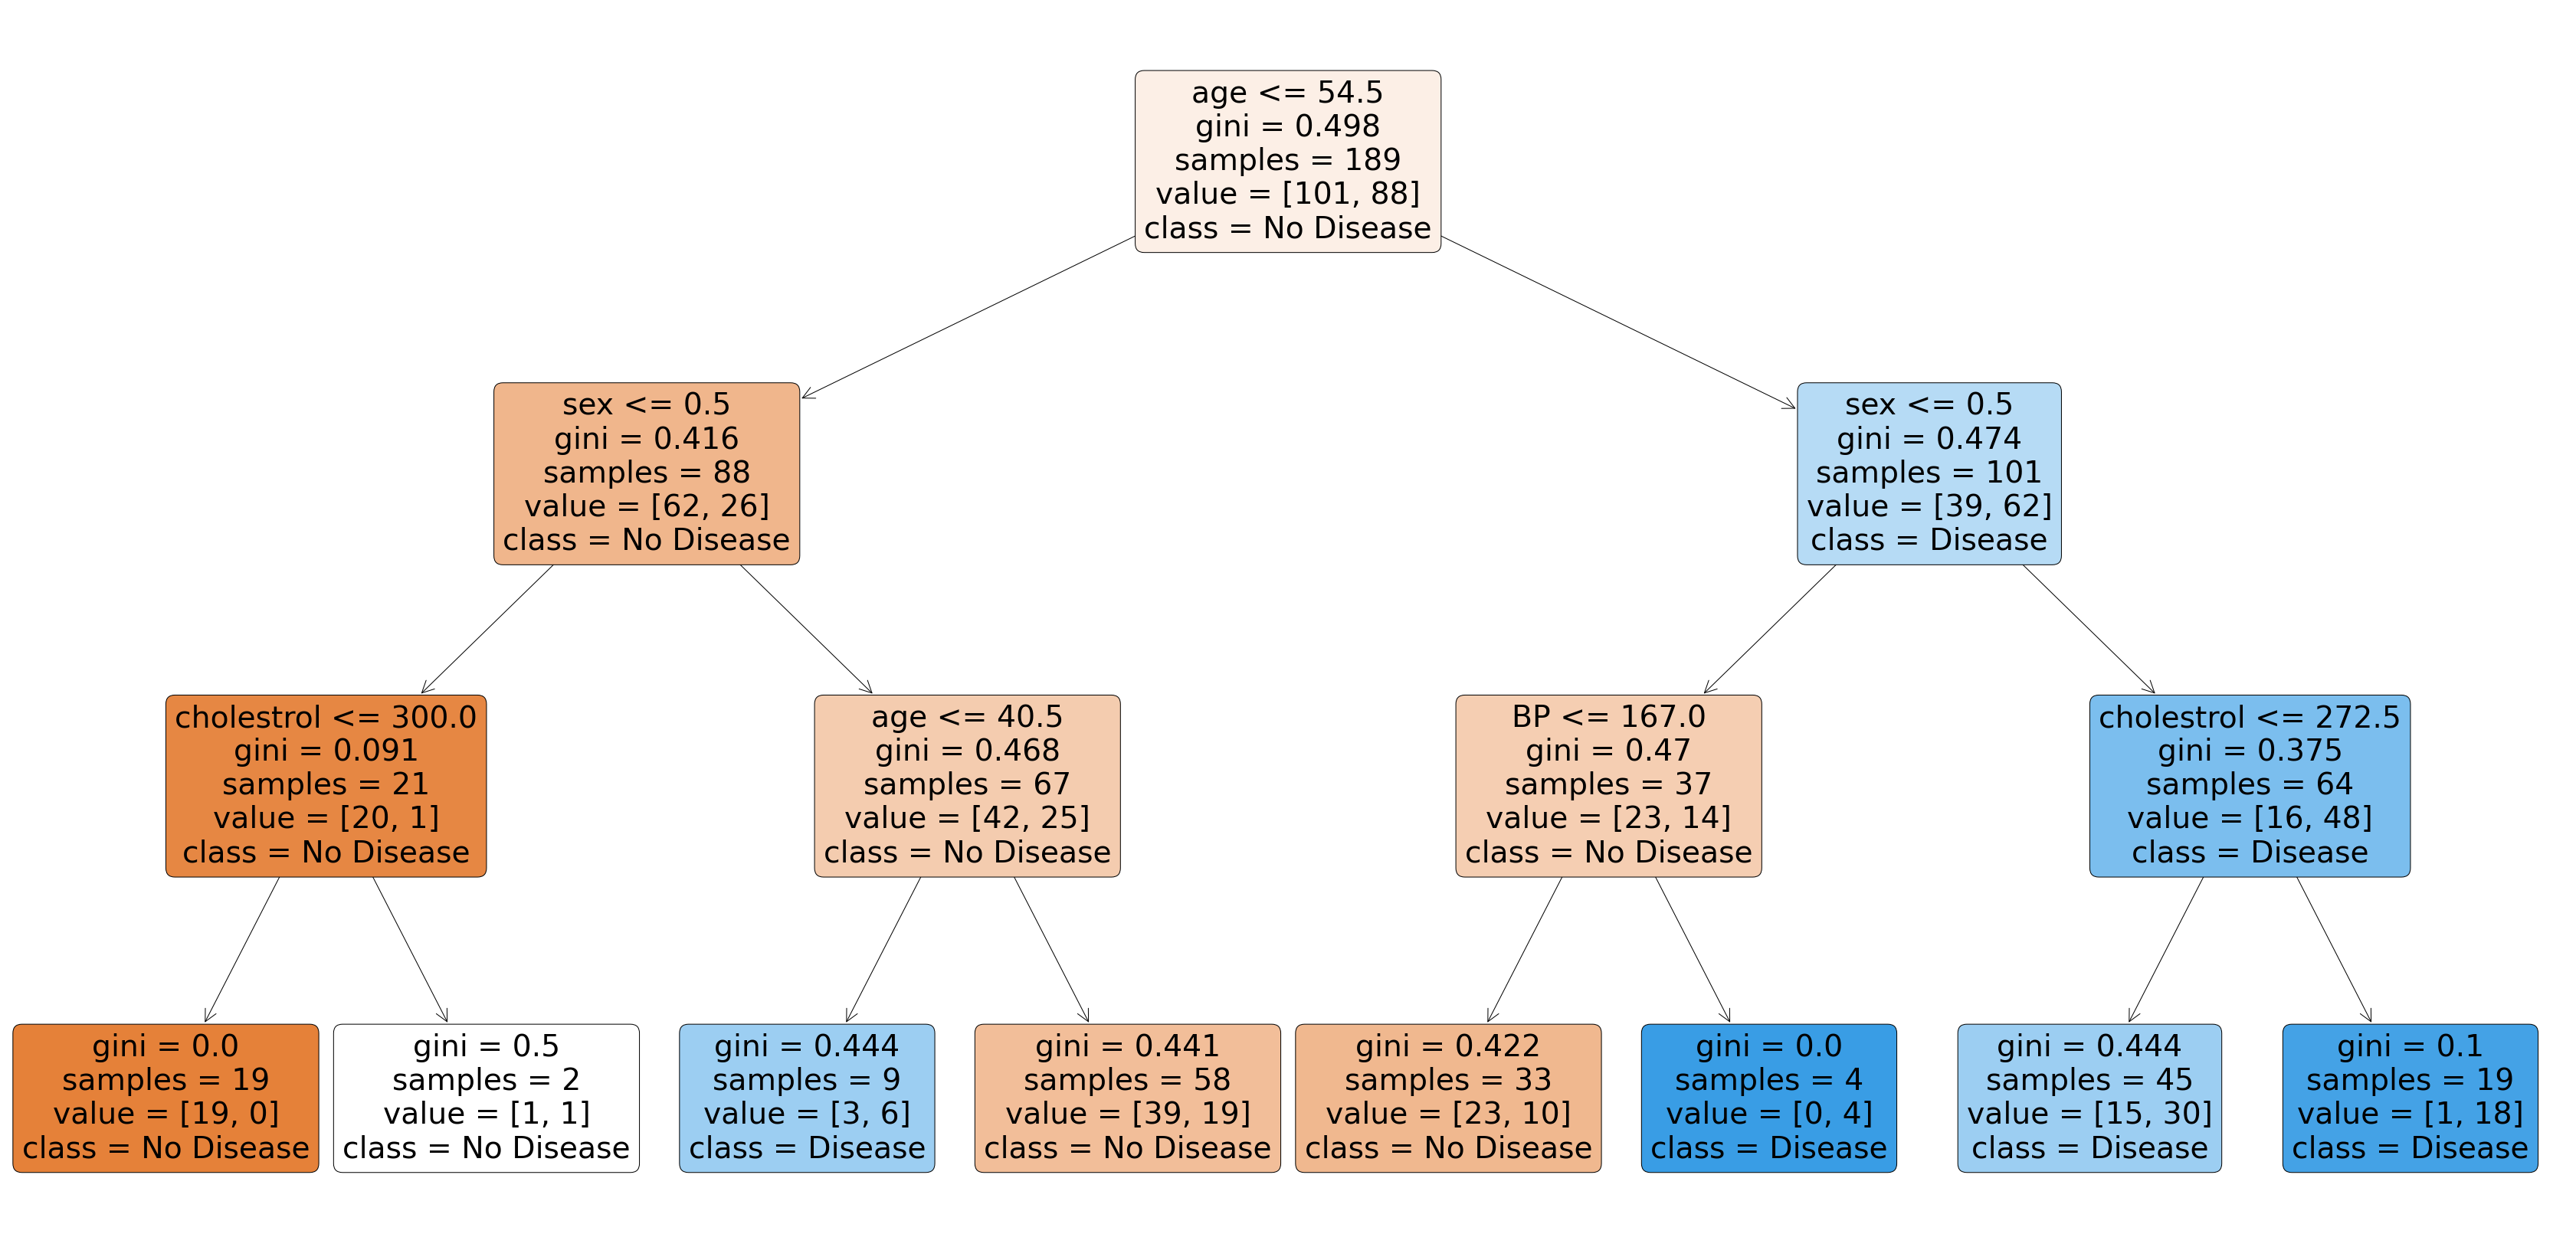

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.show()

### Evaluating Model Performance

In [17]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [42]:
print('\033[1m'+'\033[94m'+'TRAINING SET'+'\033[0m'+'\n')

print('\033[1m'+'Accuracy Score'+'\033[0m')
print(accuracy_score(y_train, y_train_pred))

print('\n'+'\033[1m'+'Confusion Matrix'+'\033[0m')
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})
cm_df

TRAINING SET

Accuracy Score
0.7407407407407407

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,82,19
Actual 1,30,58


In [44]:
print('\033[1m'+'\033[94m'+'TESTING SET'+'\033[0m'+'\n')

print('\033[1m'+'Accuracy Score'+'\033[0m')
print(accuracy_score(y_test, y_test_pred))

print('\n'+'\033[1m'+'Confusion Matrix'+'\033[0m')
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

TESTING SET

Accuracy Score
0.6049382716049383

Confusion Matrix


,Predicted 0,Predicted 1
0,35,14
1,18,14
